# TASK 3 -  IRIS Flower Dataset - Decision Tree algorithm

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()

%matplotlib inline


## Imporing the dataset

In [2]:
df = pd.read_csv("Iris.csv")

### getting info about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Shuffling data so we can see data mix-up

In [4]:
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
print(df.shape)
df.head(10)


(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,Iris-setosa
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
136,137,6.3,3.4,5.6,2.4,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor


In [6]:
df.drop(axis=1,columns=["Id"]).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,5.0,3.5,1.3,0.3,Iris-setosa
78,6.0,2.9,4.5,1.5,Iris-versicolor
136,6.3,3.4,5.6,2.4,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor


In [7]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Mean, Variance, Max, Min

In [8]:
df.iloc[:,1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### In first, check if any nan value is existing

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Pair plot

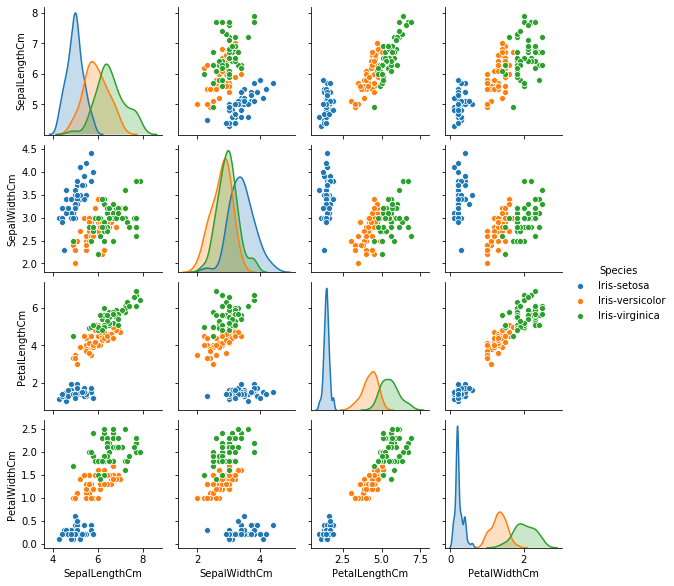

In [11]:
sns.pairplot(df.drop(axis=1,columns = ["Id"]),hue = 'Species',height=2,aspect=1)

### Distribution graph so we can easily predict it will be a "setosa" flower if petal length is below 2.2 cm

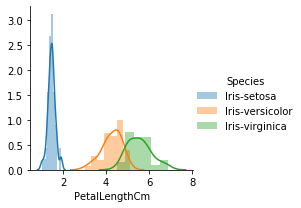

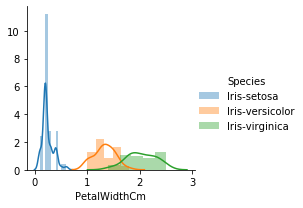

In [12]:
for i,item in enumerate(["PetalLengthCm","PetalWidthCm"]):
    g=sns.FacetGrid(df,hue = "Species",height=3)
    g.map(sns.distplot,item)
    g.add_legend()

### Relation between petal length and width, linear relationship exist for some values

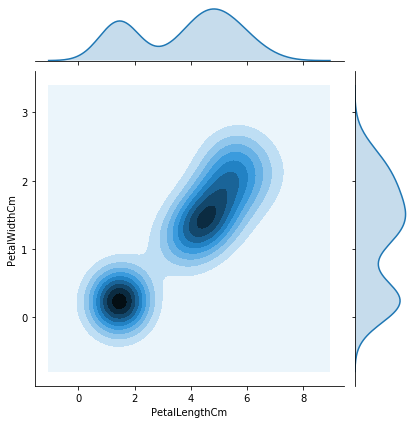

In [13]:
sns.jointplot(x = df["PetalLengthCm"],y = df["PetalWidthCm"],kind = 'kde')

### Distribution of data 

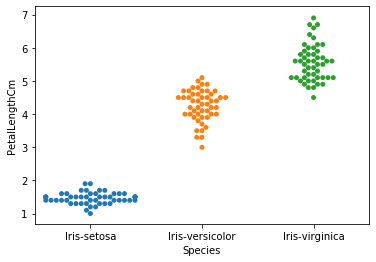

In [14]:
sns.swarmplot(x = "Species",y = "PetalLengthCm",data=df )

### We can incode target features values, but for decision tree there is no need

In [15]:
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# df.iloc[:,-1] = lb.fit_transform(df.iloc[:,-1])

### Splitting the data

In [16]:
X = df.iloc[:,1:-1].values
y = df.Species.values

In [17]:
print(X[:5,:],y[:5])

[[5.  3.5 1.3 0.3]
 [6.  2.9 4.5 1.5]
 [6.3 3.4 5.6 2.4]
 [5.1 3.8 1.9 0.4]
 [5.5 2.5 4.  1.3]] ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor']


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(X,y,test_size=0.25,random_state=3)

## Implementing Decision tree algorithm without hyperparameter tuning

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print(dtc.score(x_train, y_train))
print(dtc.score(x_valid, y_valid))

1.0
0.9473684210526315


### We can see this machine learning algorithm overfitted on training data, we can tune this model

#### Importing gridsearchcv for hyparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {"criterion" :["gini","entropy"],"splitter":["best","random"],"min_samples_split":[2,3,4],
          "min_samples_leaf":[2,3,4],"max_features":[1,2,3,4],"max_depth":[3,4,5,6,7,8,9,10]}

In [32]:
tree = DecisionTreeClassifier(random_state=3)
gridsearch = GridSearchCV(estimator=tree,param_grid=params,scoring="accuracy",n_jobs = -1,cv=5)
gridsearch.fit(X,y)
print(gridsearch.best_estimator_)
print(gridsearch.best_params_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')
{'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


####  It gives us best parameter values and score

In [34]:
dtc_opti = DecisionTreeClassifier(criterion='gini', max_depth= 4, max_features=4, 
                                  min_samples_leaf=3, min_samples_split=2, splitter='best',random_state = 3)
dtc_opti.fit(x_train, y_train)
print(dtc_opti.score(x_train, y_train))
print(dtc_opti.score(x_valid, y_valid))

0.9732142857142857
0.9736842105263158


### Visualize decision tree algorithm

In [36]:
from sklearn import tree

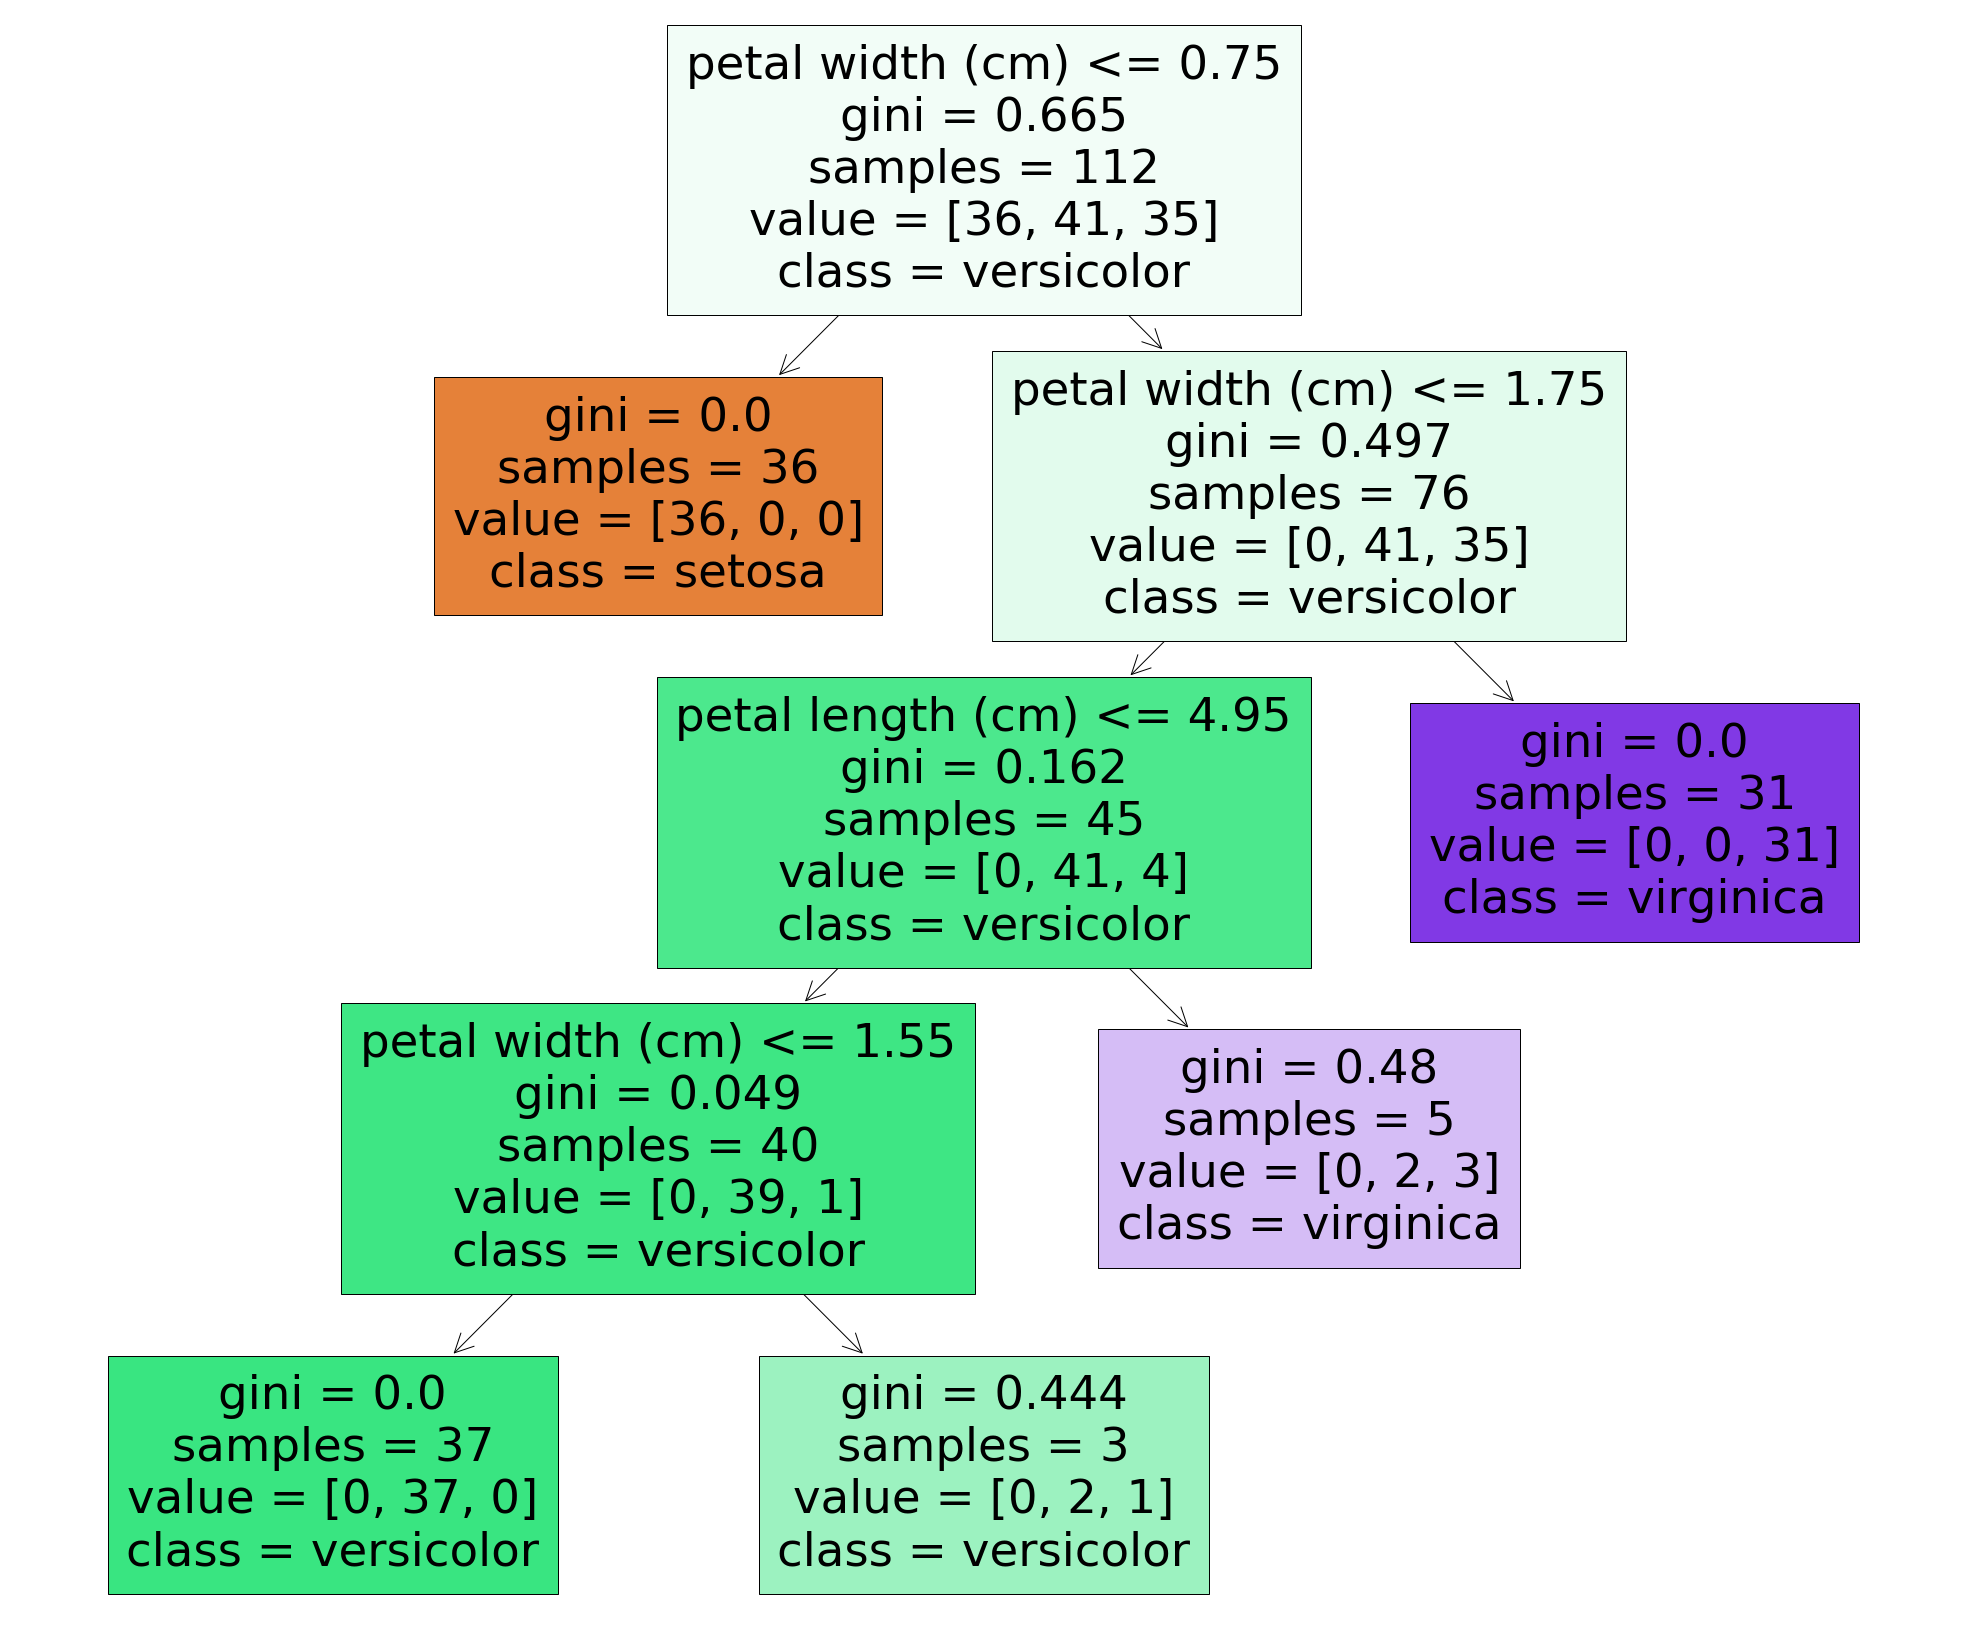

In [40]:
fig = plt.figure(figsize=(35,30))
_ = tree.plot_tree(dtc_opti, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


### Now we can see and compare it with distribution graph(plotted above), we can easily say it petal width is below 0.8 cm it will be setosa